In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from analysis import wl_accuracy, season_record, test_n
from data_format import create_data

In [4]:
version = 6
df = pd.read_csv(f'../data/baseball/training/game_data_v{version}.csv')

In [5]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [6]:
def generate_random_results():
    results = {'away_pred': [], 'home_pred': [], 'away_true': y_test_away, 'home_true': y_test_home}
    
    for i in range(len(y_test_away)):
        results['away_pred'].append(random.randint(0, 1))
        results['home_pred'].append(1 - results['away_pred'][i])
    
    return pd.DataFrame(results)

In [7]:
results = generate_random_results()

print('RANDOM GUESSING MODEL')
print('-' * 30)
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)

RANDOM GUESSING MODEL
------------------------------
Accuracy: 49.58847736625515%
------------------------------
Season records:
LAD: 91-71	MIA: 91-71	STL: 90-72	NYY: 90-72	CIN: 88-74	
SF: 88-74	SEA: 87-75	TB: 87-75	TEX: 87-75	NYM: 85-77	
WSH: 85-77	CLE: 85-77	ATL: 84-78	PIT: 82-80	CWS: 82-80	
HOU: 81-81	KC: 81-81	OAK: 81-81	MIN: 79-83	TOR: 77-85	
BAL: 76-86	BOS: 76-86	MIL: 75-87	CHC: 75-87	DET: 75-87	
PHI: 73-89	LAA: 72-90	AZ: 71-91	COL: 70-92	SD: 66-96	


                 0
count  1000.000000
mean     50.070988
std       1.040303
min      46.748971
25%      49.341564
50%      50.041152
75%      50.781893
max      53.292181


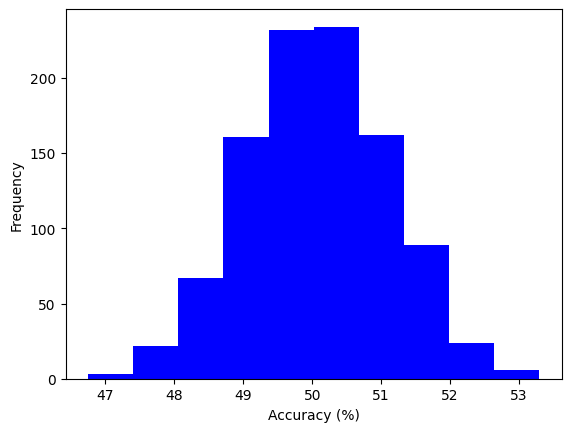

In [8]:
acc = []

for i in range(1000):
    results = generate_random_results()
    acc.append(wl_accuracy(results))

plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

print(pd.DataFrame(acc).describe())

plt.hist(acc, color='b')
plt.show()